In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_str="""Customer Number	Purchase State	Dollars Spent	Customer Satisfaction level
1	Georgia	$1,511	82
2	Georgia	$1,489	90
4	Georgia	$100	43
9	Georgia	$786	99
12	Georgia	$659	85
13	Georgia	$5,853	97
15	Georgia	$572	71
17	Georgia	$528	68
3	Florida	$1,015	85
5	Florida	$959	63
6	Florida	$915	73
7	Florida	$885	84
8	Florida	$795	71
10	Florida	$695	71
11	Florida	$680	51
14	Florida	$579	56
16	Florida	$551	51"""
columns = data_str.split('\n')[0].split('\t')
data = []
for r in data_str.split('\n')[1:]:
    cust, st, spend, sat = r.split('\t')
    spend = float(spend.replace('$','').replace(',',''))
    sat = int(sat)
    print(cust, st, spend, sat)
    data.append([cust, st, spend, sat])
df = pd.DataFrame(data=data, columns=columns)
df['Customer Satisfaction level'] = pd.to_numeric(df['Customer Satisfaction level'], errors='coerce')
display(df)

1 Georgia 1511.0 82
2 Georgia 1489.0 90
4 Georgia 100.0 43
9 Georgia 786.0 99
12 Georgia 659.0 85
13 Georgia 5853.0 97
15 Georgia 572.0 71
17 Georgia 528.0 68
3 Florida 1015.0 85
5 Florida 959.0 63
6 Florida 915.0 73
7 Florida 885.0 84
8 Florida 795.0 71
10 Florida 695.0 71
11 Florida 680.0 51
14 Florida 579.0 56
16 Florida 551.0 51


,Customer Number,Purchase State,Dollars Spent,Customer Satisfaction level
0,1,Georgia,1511.0,82
1,2,Georgia,1489.0,90
2,4,Georgia,100.0,43
3,9,Georgia,786.0,99
4,12,Georgia,659.0,85
5,13,Georgia,5853.0,97
6,15,Georgia,572.0,71
7,17,Georgia,528.0,68
8,3,Florida,1015.0,85
9,5,Florida,959.0,63


In [26]:
df.describe()

,Dollars Spent,Customer Satisfaction level
count,17.000000,17.000000
mean,1092.470588,72.941176
std,1272.870286,16.441071
min,100.000000,43.000000
25%,579.000000,63.000000
50%,786.000000,71.000000
75%,959.000000,85.000000
max,5853.000000,99.000000


In [37]:
print(df.drop(['Customer Satisfaction level'],axis=1).describe())

       Dollars Spent
count      17.000000
mean     1092.470588
std      1272.870286
min       100.000000
25%       579.000000
50%       786.000000
75%       959.000000
max      5853.000000


In [27]:
df[df['Purchase State'] == 'Georgia'].describe()

,Dollars Spent,Customer Satisfaction level
count,8.000000,8.000000
mean,1437.250000,79.375000
std,1847.793878,18.399825
min,100.000000,43.000000
25%,561.000000,70.250000
50%,722.500000,83.500000
75%,1494.500000,91.750000
max,5853.000000,99.000000


In [30]:
df[(df['Purchase State'] == 'Georgia') & (df['Dollars Spent'] < 2000)].describe()

,Dollars Spent,Customer Satisfaction level
count,7.000000,7.000000
mean,806.428571,76.857143
std,518.972978,18.325106
min,100.000000,43.000000
25%,550.000000,69.500000
50%,659.000000,82.000000
75%,1137.500000,87.500000
max,1511.000000,99.000000


In [28]:
df[df['Purchase State'] == 'Florida'].describe()

,Dollars Spent,Customer Satisfaction level
count,9.000000,9.000000
mean,786.000000,67.222222
std,168.257244,12.891642
min,551.000000,51.000000
25%,680.000000,56.000000
50%,795.000000,71.000000
75%,915.000000,73.000000
max,1015.000000,85.000000


In [38]:
df_ga = df[df['Purchase State'] == 'Georgia']
display(df_ga)
df_fl = df[df['Purchase State'] == 'Florida']
df_ga_dollar = df_ga.drop(['Customer Satisfaction level'], axis=1)
df_fl_dollar = df_fl.drop(['Customer Satisfaction level'], axis=1)
print(df_ga_dollar.describe())
df_ga_dollar.describe().values.tolist()

,Customer Number,Purchase State,Dollars Spent,Customer Satisfaction level
0,1,Georgia,1511.0,82
1,2,Georgia,1489.0,90
2,4,Georgia,100.0,43
3,9,Georgia,786.0,99
4,12,Georgia,659.0,85
5,13,Georgia,5853.0,97
6,15,Georgia,572.0,71
7,17,Georgia,528.0,68


       Dollars Spent
count       8.000000
mean     1437.250000
std      1847.793878
min       100.000000
25%       561.000000
50%       722.500000
75%      1494.500000
max      5853.000000


[[8.0],
 [1437.25],
 [1847.7938776513236],
 [100.0],
 [561.0],
 [722.5],
 [1494.5],
 [5853.0]]

In [21]:
# df_sat = df.copy().sort_values(by='Customer Satisfaction level', ascending=False).reset_index(drop=True)
df_sat = df.groupby('Purchase State')['Customer Satisfaction level'].mean().reset_index()
display(df_sat)

,Purchase State,Customer Satisfaction level
0,Florida,67.222222
1,Georgia,79.375000


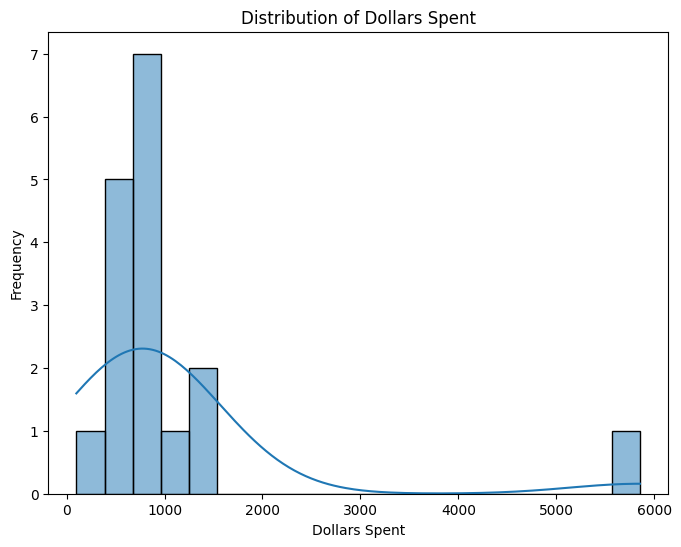

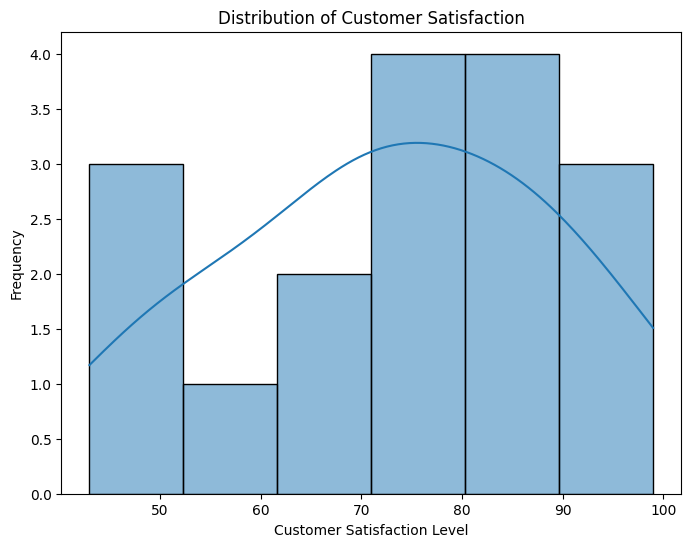

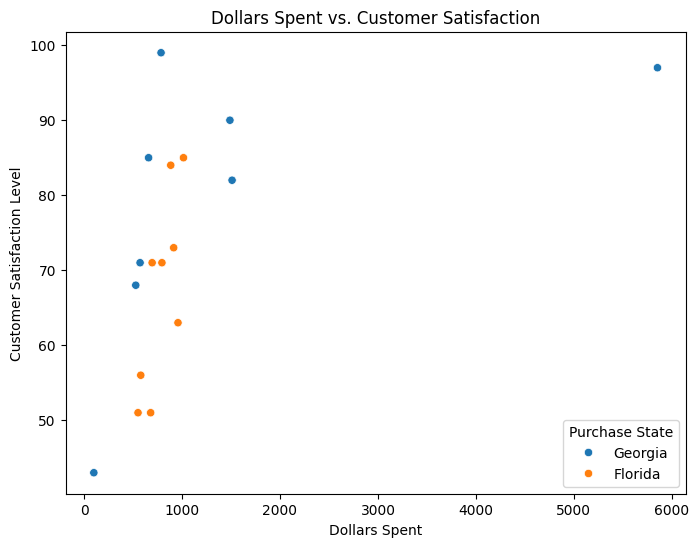

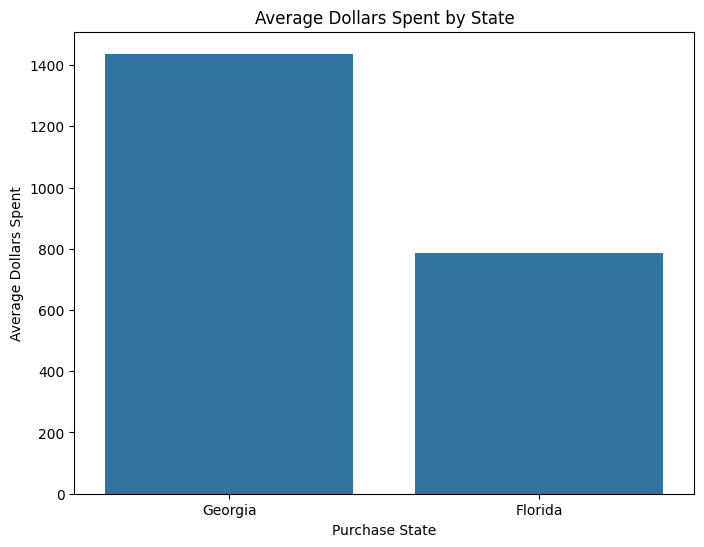

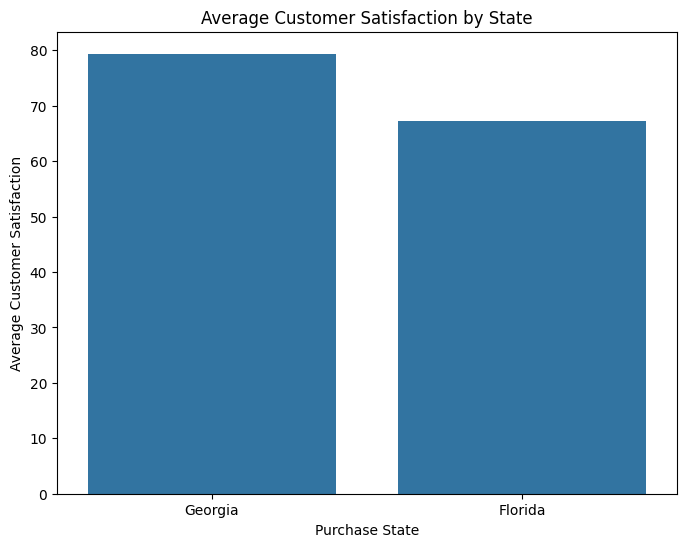

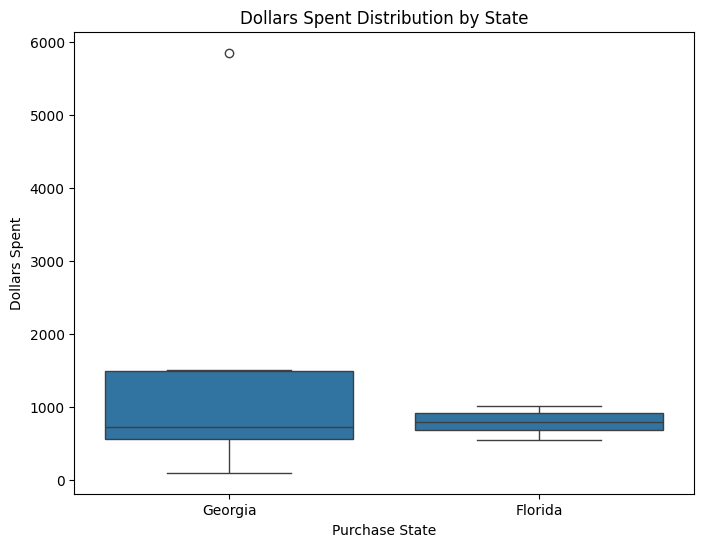

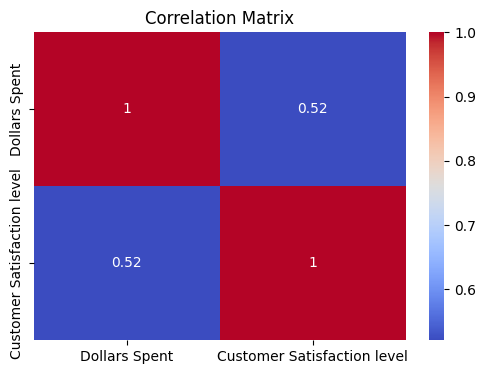

In [24]:
# 1. Distribution of Dollars Spent
plt.figure(figsize=(8, 6))
sns.histplot(df['Dollars Spent'], kde=True)
plt.title('Distribution of Dollars Spent')
plt.xlabel('Dollars Spent')
plt.ylabel('Frequency')
plt.show()

# 2. Customer Satisfaction Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Customer Satisfaction level'], kde=True)
plt.title('Distribution of Customer Satisfaction')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

# 3. Dollars Spent vs. Customer Satisfaction (scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Dollars Spent', y='Customer Satisfaction level', data=df, hue='Purchase State')
plt.title('Dollars Spent vs. Customer Satisfaction')
plt.xlabel('Dollars Spent')
plt.ylabel('Customer Satisfaction Level')
plt.show()

# 4. Average Dollars Spent by State
plt.figure(figsize=(8, 6))
sns.barplot(x='Purchase State', y='Dollars Spent', data=df, errorbar=None)
plt.title('Average Dollars Spent by State')
plt.xlabel('Purchase State')
plt.ylabel('Average Dollars Spent')
plt.show()

# 5. Average Customer Satisfaction by State
# df_sat = df.copy().sort_values(by='Customer Satisfaction level', ascending=False).reset_index(drop=True)
df_sat = df.groupby('Purchase State')['Customer Satisfaction level'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Purchase State', y='Customer Satisfaction level', data=df_sat, errorbar=None)
plt.title('Average Customer Satisfaction by State')
plt.xlabel('Purchase State')
plt.ylabel('Average Customer Satisfaction')
plt.show()

# 6. Box Plot of Dollars Spent by State
plt.figure(figsize=(8, 6))
sns.boxplot(x='Purchase State', y='Dollars Spent', data=df)
plt.title('Dollars Spent Distribution by State')
plt.xlabel('Purchase State')
plt.ylabel('Dollars Spent')
plt.show()

# 7. Correlation Matrix (if needed - good for numerical data)
correlation_matrix = df[['Dollars Spent', 'Customer Satisfaction level']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

What do you notice about the differences between customer spend when comparing Georgia customers to Florida customers? Be sure to reference some descriptive statistics such as min, max, range, outliers, standard deviation, etc. in your response.  

Basic statistical profiling of both states:

Dollars Spent
count      17.000000
mean     1092.470588
std      1272.870286
min       100.000000
25%       579.000000
50%       786.000000
75%       959.000000
max      5853.000000

Customer spend is higher in Georgia on average but there does seem to be an outlier of over 5x the average. Taking out that outlier puts the two averages only $20 apart and when removing that outlier, each state both has 8 transactions.

Dollars Spent in Georgia
count       8.000000
mean     1437.250000
std      1847.793878
min       100.000000
25%       561.000000
50%       722.500000
75%      1494.500000
max      5853.000000

Dollars Spent in Florida
count       9.000000
mean      786.000000
std       168.257244
min       551.000000
25%       680.000000
50%       795.000000
75%       915.000000
max      1015.000000

In [39]:
print(df_ga_dollar.describe())
print(df_fl_dollar.describe())

       Dollars Spent
count       8.000000
mean     1437.250000
std      1847.793878
min       100.000000
25%       561.000000
50%       722.500000
75%      1494.500000
max      5853.000000
       Dollars Spent
count       9.000000
mean      786.000000
std       168.257244
min       551.000000
25%       680.000000
50%       795.000000
75%       915.000000
max      1015.000000


In your reading Choosing the Right Statistical Test | Types & ExamplesLinks to an external site. you saw that there are many different types of statistical tests you can use to do hypothesis testing. The right test to choose will be based on many factors such as the attributes of your data, the types of variables, and whether you are looking to understand relationships or compare differences. In this scenario, we are interested in testing whether there is a significant difference or ‘comparison’ between the means of two stores (a categorical predictor variable) in the amount of money spent by customers (a quantitative outcome variable). We can see from the customer ID number that the customers who made purchases in one state are not also the same customers making purchases in the other state, so we would say that the groups of Georgia and Florida customers come from different populations.

According to your reading, what is the correct statistical test to use in testing our hypothesis? 
Independent T Test

In [40]:
sorted_df = df.sort_values(by='Customer Satisfaction level')
display(sorted_df)

,Customer Number,Purchase State,Dollars Spent,Customer Satisfaction level
2,4,Georgia,100.0,43
16,16,Florida,551.0,51
14,11,Florida,680.0,51
15,14,Florida,579.0,56
9,5,Florida,959.0,63
7,17,Georgia,528.0,68
13,10,Florida,695.0,71
12,8,Florida,795.0,71
6,15,Georgia,572.0,71
10,6,Florida,915.0,73
